In [1]:
import numpy as np
import pandas as pd
import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
# from mpl_finance import candlestick_ohlc
import mplfinance as mpf

from binance.client import Client
from config import *

client = Client(api_key, api_secret)

In [2]:
def heikin_ashi(df):
    heikin_ashi_df = pd.DataFrame(index=df.index.values, columns=['Open', 'High', 'Low', 'Close'])
    
    heikin_ashi_df['Close'] = (df['Open'] + df['High'] + df['Low'] + df['Close']) / 4
    
    for i in range(len(df)):
        if i == 0:
            heikin_ashi_df.iat[0, 0] = df['Open'].iloc[0]
        else:
            heikin_ashi_df.iat[i, 0] = (heikin_ashi_df.iat[i-1, 0] + heikin_ashi_df.iat[i-1, 3]) / 2
        
    heikin_ashi_df['High'] = heikin_ashi_df.loc[:, ['Open', 'Close']].join(df['High']).max(axis=1)
    
    heikin_ashi_df['Low'] = heikin_ashi_df.loc[:, ['Open', 'Close']].join(df['Low']).min(axis=1)
    
    return heikin_ashi_df

In [16]:
### OHLCV
L3m = client.futures_historical_klines(
    symbol=f'DOTUSDT',
    interval='5m',
    # start_str='10-27-2021 20:15:00', ### 5 horas adicionales a la requerida
    # end_str='11-01-2021 13:00:00', ### 5 horas adicionales too
    # start_str='12-04-2021 06:00:00', ### 5 horas adicionales a la requerida
    start_str='12-15-2021 00:00:00', ### 5 horas adicionales a la requerida
    # limit=999
    limit=100
)

arr_l = np.array(L3m).astype(np.float64)
index = pd.DatetimeIndex(pd.to_datetime(arr_l[:, 0], unit='ms'))# .tz_localize('UTC').tz_convert('America/Lima')
df_serie = pd.DataFrame(arr_l[:, 4], index=index)
SS = np.array(df_serie[0])
SS.shape

(57,)

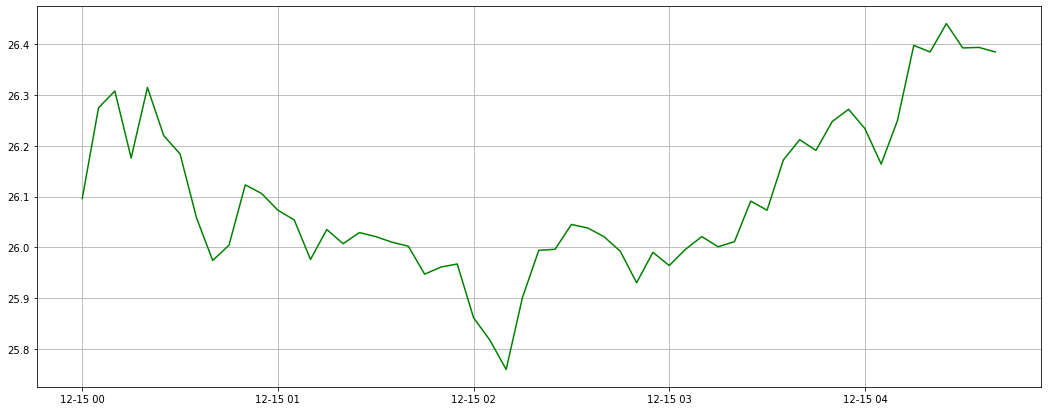

In [17]:
plt.figure(figsize=(18, 7))
plt.plot(index, SS, c='green')
plt.grid()
plt.show()

In [20]:
### HEIKIN ASHI
da = pd.DataFrame(arr_l[:, 1:5], columns=['Open', 'High', 'Low', 'Close'], index=index)
ds = heikin_ashi(da)
ds['Open'] = ds['Open'].astype(np.float64)
ds = ds[['Open', 'Close']]
ds['Delta'] = (ds['Close'] - ds['Open'])/ds['Open']
ds['Side'] = [1 if i>0 else 0 for i in ds['Delta']]
ds

,Open,Close,Delta,Side
2021-12-15 00:00:00,26.120000,26.11000,-0.000383,0
2021-12-15 00:05:00,26.115000,26.20000,0.003255,1
2021-12-15 00:10:00,26.157500,26.28950,0.005046,1
2021-12-15 00:15:00,26.223500,26.23250,0.000343,1
2021-12-15 00:20:00,26.228000,26.24375,0.000601,1
2021-12-15 00:25:00,26.235875,26.24900,0.000500,1
2021-12-15 00:30:00,26.242438,26.20025,-0.001608,0
2021-12-15 00:35:00,26.221344,26.12150,-0.003808,0
2021-12-15 00:40:00,26.171422,26.01250,-0.006072,0
2021-12-15 00:45:00,26.091961,26.00250,-0.003429,0


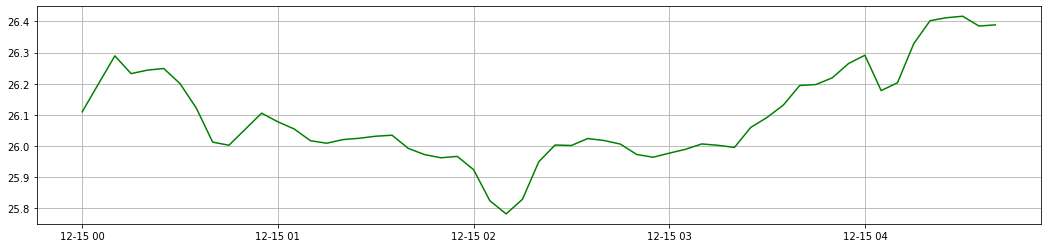

In [27]:
plt.figure(figsize=(18, 4))
plt.plot(ds.index, ds.Close, c='green')
plt.grid()
plt.show()

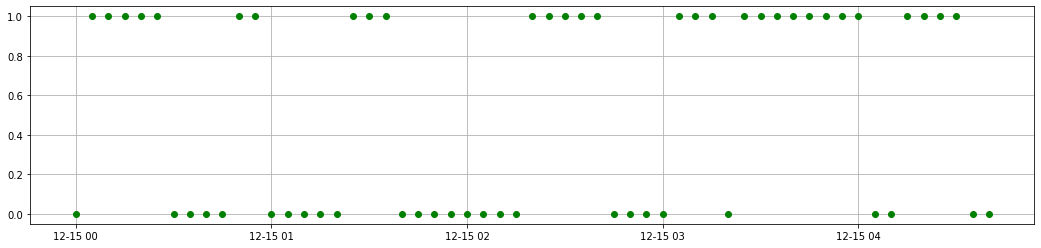

In [26]:
plt.figure(figsize=(18, 4))
plt.plot(ds.index, ds.Side, "o", c='green')
plt.grid()
plt.show()